In [4]:
import numpy
import tensorflow as tf



In [5]:
#import data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train= numpy.array(x_train,numpy.float32)
x_test= numpy.array(x_test,numpy.float32)

print("x training:",x_train.shape)

x training: (60000, 28, 28)


In [8]:
number_fetures = 784 # 28*28
number_class = 10
x_train = x_train.reshape([-1,number_fetures])
x_test = x_test.reshape([-1,number_fetures])
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
x_train = x_train/255.0
x_test = x_test/255.0
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
batch_size = 256
display_step = 50
learning_rate = 0.01
training_step =1000
train_data = tensorflow.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

2023-05-10 16:39:54.349590: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.
2023-05-10 16:39:55.426832: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


In [32]:
#build model
#y = w*x + b
w = tensorflow.Variable(tensorflow.ones([number_fetures , number_class]),name  ='weight')
b = tensorflow.Variable(tensorflow.ones([number_class]),name  ='bias')

#logistic regression
def logistic_regression(x):
 return tensorflow.nn.softmax(tensorflow.matmul(x,w) + b)
#loss function 
def cross_entropy(y_pred,y_true):
 y_true = tensorflow.one_hot(y_true,depth=number_class)
 y_gred = tf.clip_by_value(y_pred,1e-9,1.0)
 return tensorflow.reduce_mean(-tensorflow.reduce_sum(y_true* tensorflow.math.log(y_pred),1))


#accuracy function
def accuracy(y_pred,y_true):
 correct_prediction = tensorflow.equal(tensorflow.argmax(y_pred,1),tensorflow.cast(y_true,tensorflow.int64))
 return tensorflow.reduce_mean(tensorflow.cast(correct_prediction,tensorflow.float32))


optimizer = tensorflow.optimizers.SGD(learning_rate)


def run_optimization(x,y):
 with tensorflow.GradientTape() as g:
  pred =logistic_regression(x)
  loss = cross_entropy(pred,y)
 gradients = g.gradient(loss,[w,b])
 print("before",b)
 optimizer.apply_gradients(zip(gradients,[w,b]))
 print("after",b)
 
 #run training
 
for step, (batch_x,batch_y) in enumerate(train_data.take(training_step),1):
  run_optimization(batch_x,batch_y)
  if step % display_step ==0:
   pred = logistic_regression(batch_x)
   loss = cross_entropy(pred,batch_y)
   acc = accuracy(pred,batch_y)
   print(f"step{step} loss:{loss} acc:{acc}")
  

2023-05-10 17:34:19.422436: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype uint8 and shape [60000]
	 [[{{node Placeholder/_1}}]]
2023-05-10 17:34:19.422792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,784]
	 [[{{node Placeholder/_0}}]]


before <tf.Variable 'bias:0' shape=(10,) dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>
after <tf.Variable 'bias:0' shape=(10,) dtype=float32, numpy=
array([1.0001719 , 0.9999766 , 1.0002891 , 0.9998594 , 0.9999375 ,
       0.9997031 , 1.0000937 , 0.9999766 , 0.99978125, 1.0002109 ],
      dtype=float32)>
before <tf.Variable 'bias:0' shape=(10,) dtype=float32, numpy=
array([1.0001719 , 0.9999766 , 1.0002891 , 0.9998594 , 0.9999375 ,
       0.9997031 , 1.0000937 , 0.9999766 , 0.99978125, 1.0002109 ],
      dtype=float32)>
after <tf.Variable 'bias:0' shape=(10,) dtype=float32, numpy=
array([0.99994373, 0.9999271 , 1.0002499 , 0.99983656, 0.9999577 ,
       0.9994964 , 1.0004163 , 1.0003898 , 0.99975955, 1.0000228 ],
      dtype=float32)>
before <tf.Variable 'bias:0' shape=(10,) dtype=float32, numpy=
array([0.99994373, 0.9999271 , 1.0002499 , 0.99983656, 0.9999577 ,
       0.9994964 , 1.0004163 , 1.0003898 , 0.99975955, 1.0000228 ],
      dtype=float3

In [27]:

test_pred = logistic_regression(x_test)
acc_test = accuracy(test_pred, y_test)
print("Accuracy: ", acc_test)


Accuracy:  tf.Tensor(0.8703, shape=(), dtype=float32)


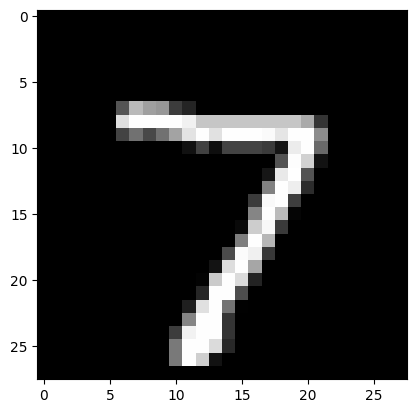

Predict:  [5.2841329e-03 6.6368165e-04 3.8276545e-03 8.5035637e-03 5.5901064e-03
 3.7921348e-03 9.8399096e-04 9.3310851e-01 4.6642274e-03 3.3581991e-02]
Predict:  7


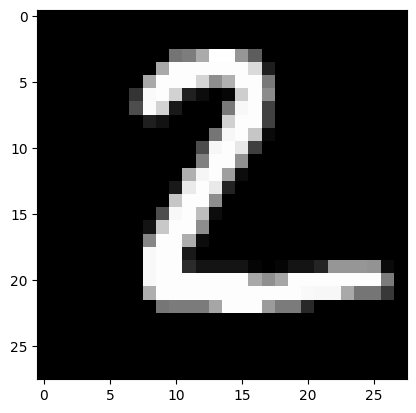

Predict:  [0.05712831 0.01532411 0.4502034  0.11823282 0.00084069 0.09775408
 0.20435658 0.00080328 0.05387959 0.00147709]
Predict:  2


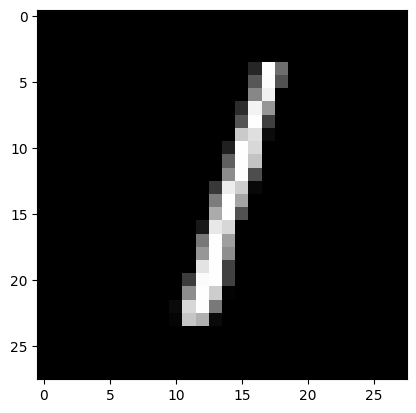

Predict:  [0.00530143 0.8238008  0.03538515 0.02875564 0.00819537 0.01520712
 0.01930157 0.01801013 0.03255086 0.013492  ]
Predict:  1


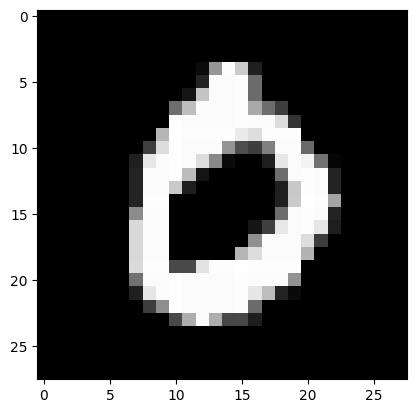

Predict:  [9.1764843e-01 7.4818454e-05 5.6681032e-03 3.3930074e-03 7.6092739e-04
 2.1765556e-02 3.3202190e-02 1.0366546e-02 2.7655761e-03 4.3549137e-03]
Predict:  0


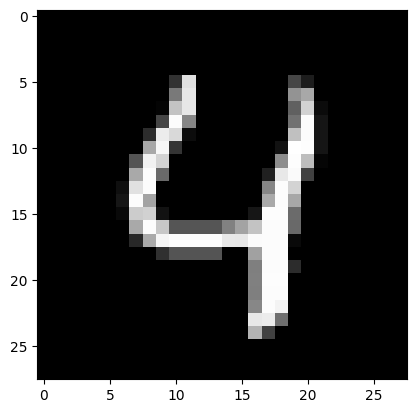

Predict:  [0.0261463  0.00121471 0.05993035 0.01013822 0.61363995 0.01600256
 0.0414736  0.0632952  0.04060137 0.12755778]
Predict:  4


In [31]:
import matplotlib.pyplot as plt
import numpy as np
n_images = 5
test_image = x_test[:n_images]
test_pred = logistic_regression(test_image)

for i in range(n_images):
 plt.imshow(np.reshape(test_image[i], (28, 28)), cmap='gray')
 plt.show()
 print("Predict: ",test_pred[i].numpy())
 print("Predict: ",numpy.argmax(test_pred[i].numpy()))